In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Netflix Data Analysis.ipynb'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# import sklearn text_processing library
from sklearn.feature_extraction.text import CountVectorizer
#import spacy
#import nltk
#from nltk.stem import PorterStemmer
#from wordcloud import WordCloud

sns.set()

%matplotlib inline

In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# DataFrame Column can be found by using .dtypes method of DataFrame object
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
# In these case, we can use to_datetime method of pandas
df["date_added"] = pd.to_datetime(df["date_added"])

In [7]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [9]:
# show_id should be unique,so let's check its uniqueness 
# nunique method can show the number of unique values in dataframe
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1512
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [10]:
# First of all, let's check the value of type column
df["type"].head()

0    TV Show
1      Movie
2      Movie
3      Movie
4      Movie
Name: type, dtype: object

Text(0.5, 1.0, 'Show Type Count in Netflix dataset')

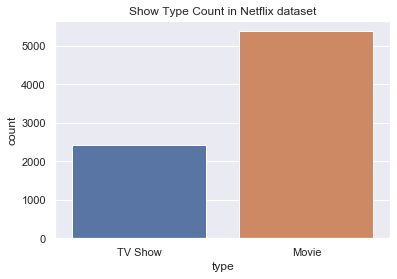

In [11]:
sns.countplot("type", data=df)
plt.title("Show Type Count in Netflix dataset")

In [12]:
df["title"]


0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

In [13]:
# Use Bag of Words, and vectorize all the words.
countvectorizer = CountVectorizer(stop_words="english")
bow = countvectorizer.fit_transform(df["title"])
bow.toarray(), bow.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 (7787, 8049))

In [14]:
# Get feature names
feature_names = countvectorizer.get_feature_names()

# View some feature names
feature_names[150:160]

['abdo',
 'abducted',
 'abdullah',
 'abel',
 'abhinetri',
 'abnormal',
 'abominable',
 'abrazo',
 'abroad',
 'abstract']

In [15]:
# Create data frame (column: words in title, row: each row of original dataframe)
bow_result_df = pd.DataFrame(bow.toarray(), columns=feature_names)
bow_result_df.head()

,000,009,01,09,10,100,1000,100kg,101,12,...,แผนร,忍者ハットリくん,海的儿子,마녀사냥,미니특공대,반드시,영웅의,잡는다,최강전사,탄생
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Let's see the word that is used for 20 times.
frequent_word_df = pd.DataFrame(bow_result_df.sum(), bow_result_df.columns)
frequent_word_df = frequent_word_df.rename(columns={0:"count"})
frequent_word_df = frequent_word_df[frequent_word_df["count"] > 20]
frequent_word_df.head(5)

,count
adventures,21
america,22
american,45
baby,27
bad,25


In [17]:
frequent_word_sorted_df = frequent_word_df.sort_values("count", ascending=False)
frequent_word_sorted_df.head()

,count
love,152
man,79
christmas,78
world,69
story,67


Text(0.5, 1.0, 'Word Count of Movie Titles')

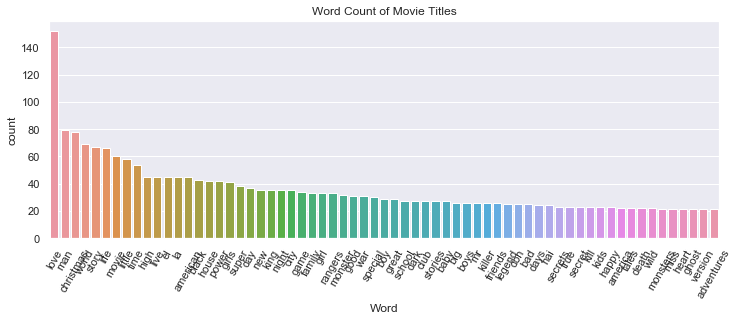

In [18]:
plt.figure(figsize=(12, 4))
sns.barplot(frequent_word_sorted_df.index, frequent_word_sorted_df["count"])
plt.xticks(rotation=60)
plt.xlabel("Word")
plt.title("Word Count of Movie Titles")

In [19]:
# How many NaN is included here?
df["director"].isnull().sum()

2389

In [20]:
# pick up directors who directs more than twice.
director_df = df["director"]
director_removed_nan_df = director_df.dropna()
director_removed_nan_df.head()

1    Jorge Michel Grau
2         Gilbert Chan
3          Shane Acker
4       Robert Luketic
5          Serdar Akar
Name: director, dtype: object

In [21]:
# I want a dictionary which contains how many times does each director appear?
# Key: Director(s) Name, Value: Appearance Count of each directors
director_count = {}

for i in director_removed_nan_df.index:
    director_count.setdefault(director_removed_nan_df[i], 0)
    director_count[director_removed_nan_df[i]] += 1
# In the director_count dictionary, we pick up the frequent directors.
# Criteria: Appearance Count is 6 times and above.
frequent_director_count = {}

for key,value in director_count.items():
    if value >= 6:
        frequent_director_count.setdefault(key, value)
frequent_director_count

{'Kunle Afolayan': 8,
 'Ozan Açıktan': 7,
 'McG': 7,
 'Cathy Garcia-Molina': 13,
 'Justin G. Dyck': 7,
 'Jay Karas': 14,
 'Ram Gopal Varma': 6,
 'Rajkumar Santoshi': 6,
 'Raúl Campos, Jan Suter': 18,
 'Youssef Chahine': 12,
 'Martin Scorsese': 12,
 'Ron Howard': 6,
 'Marcus Raboy': 16,
 'S.S. Rajamouli': 7,
 'Wenn V. Deramas': 6,
 'Omoni Oboli': 7,
 'Hakan Algül': 8,
 'Ryan Polito': 8,
 'Shannon Hartman': 8,
 'Johnnie To': 8,
 'Jay Chapman': 12,
 'Troy Miller': 6,
 'Don Michael Paul': 7,
 'Vlad Yudin': 6,
 'Steven Spielberg': 10,
 'David Dhawan': 9,
 'Lance Bangs': 8,
 'Fernando Ayllón': 7,
 'Anees Bazmee': 6,
 'Joey So': 6,
 'Quentin Tarantino': 8,
 'Yılmaz Erdoğan': 7,
 'Noah Baumbach': 6,
 'Sameh Abdulaziz': 6,
 'Steven Soderbergh': 6,
 'Imtiaz Ali': 6,
 'Sooraj R. Barjatya': 6,
 'Ashutosh Gowariker': 6,
 'Hanung Bramantyo': 6,
 'Robert Rodriguez': 8,
 'Robert Vince': 6,
 'Matt Askem': 6}

Text(0.5, 0, 'Director(s)')

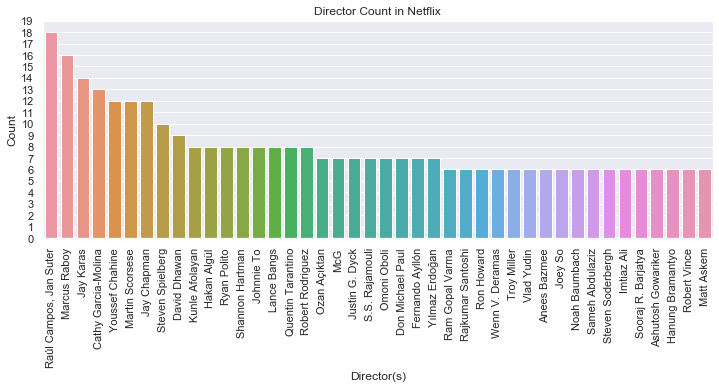

In [22]:
sorted_dict = sorted(frequent_director_count.items(), key=lambda x:x[1], reverse=True)
x = []
y = []
for i in range(len(sorted_dict)):
    x.append(sorted_dict[i][0])
    y.append(sorted_dict[i][1])
plt.figure(figsize=(12,4))
sns.barplot(x, y)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 20, step=1))
plt.title("Director Count in Netflix")
plt.ylabel("Count")
plt.xlabel("Director(s)")

In [23]:
df["country"][0]
df["country"].dropna()[0].split(",")

['Brazil']

Text(0.5, 1.0, 'Country Count in Netflix')

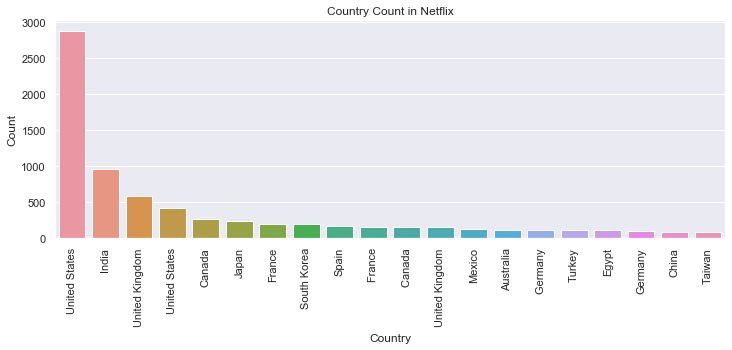

In [24]:
# Let's create the dictionary that contains how many times does each country appear?
# Key: Country Name, Value: Times that each country appears.
frequent_country = {}

for i in df["country"].dropna().index:
    country_list = df["country"].dropna()[i].split(",")
    for country in country_list:
        frequent_country.setdefault(country, 0)
        frequent_country[country] += 1
# Sort it by using sorted function in dictionary.
sorted_dict = sorted(frequent_country.items(), key=lambda x:x[1], reverse=True)
x = []
y = []
for i in range(len(sorted_dict)):
    x.append(sorted_dict[i][0])
    y.append(sorted_dict[i][1])
# Plot the result of the countries which is in top 20.
plt.figure(figsize=(12, 4))
sns.barplot(x[:20], y[:20])
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Country Count in Netflix")

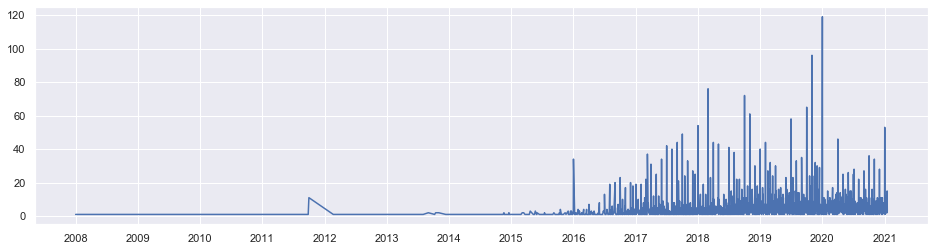

In [25]:
df["date_added"]
df["date_added"].isnull().sum()
date_count_series = df.groupby("date_added")["show_id"].count()
date_count_series.head()
plt.figure(figsize=(16, 4))
plt.plot(date_count_series.index, date_count_series.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

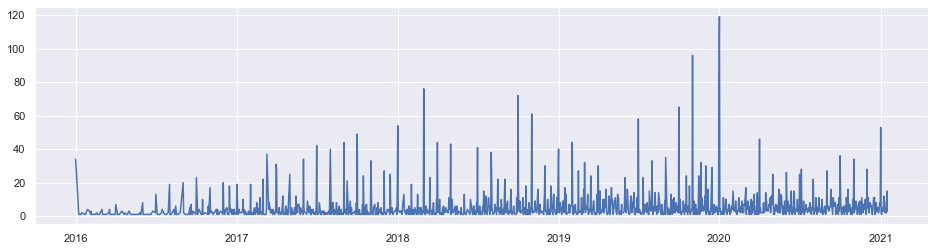

In [26]:
plt.figure(figsize=(16, 4))
plt.plot(date_count_series[date_count_series.index >= "2016-01-01"].index, date_count_series[date_count_series.index >= "2016-01-01"].values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

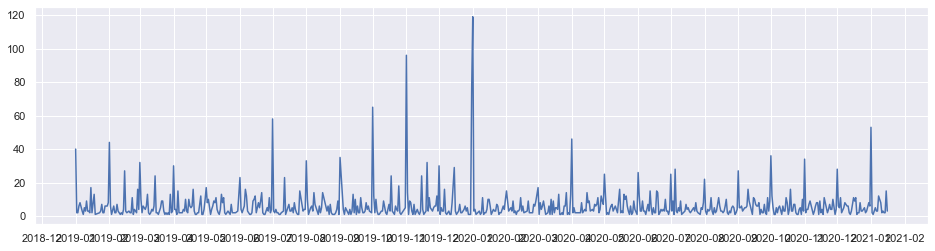

In [27]:
plt.figure(figsize=(16, 4))
plt.plot(date_count_series[date_count_series.index >= "2019-01-01"].index, date_count_series[date_count_series.index >= "2019-01-01"].values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

In [28]:
date_type_df = pd.DataFrame(date_count_series)
date_type_df["day_type"] = date_count_series.index.dayofweek
date_type_df.head(5)

,show_id,day_type
date_added,,
2008-01-01,1,1
2008-02-04,1,0
2009-05-05,1,1
2009-11-18,1,2
2010-11-01,1,0


In [29]:
grouped_date_type_series = date_type_df.groupby("day_type").count()
grouped_date_type_series

,show_id
day_type,
0,194
1,236
2,209
3,223
4,293
5,190
6,167


Text(0.5, 1.0, 'Day type Count in Netflix')

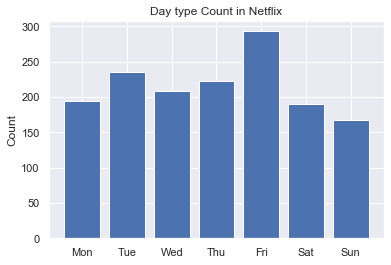

In [30]:
day_type=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.bar(x=grouped_date_type_series.index, height=grouped_date_type_series["show_id"])
plt.xticks(np.arange(7), labels=day_type)
plt.ylabel("Count")
plt.title("Day type Count in Netflix")

In [31]:
release_year_series = df.groupby("release_year")["show_id"].count()
release_year_series.index = pd.to_datetime(release_year_series.index, format="%Y")
release_year_series.head(5)

release_year
1925-01-01    1
1942-01-01    2
1943-01-01    3
1944-01-01    3
1945-01-01    3
Name: show_id, dtype: int64

Text(0.5, 0, 'Year')

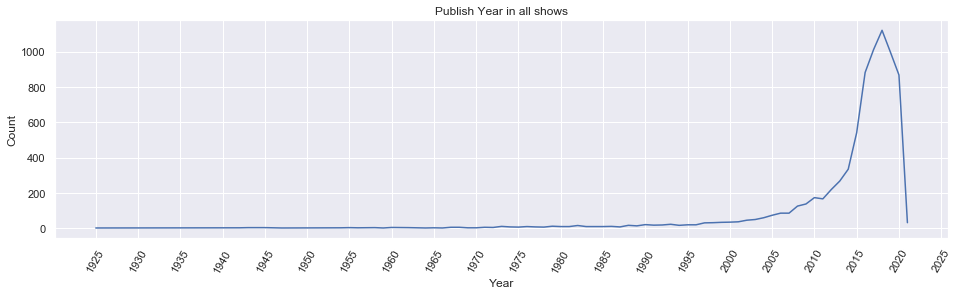

In [32]:
plt.figure(figsize=(16, 4))
plt.plot(release_year_series.index, release_year_series.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.xticks(rotation=60)
plt.title("Publish Year in all shows")
plt.ylabel("Count")
plt.xlabel("Year")

In [33]:
df["rating"].nunique()

14

Text(0.5, 1.0, 'Rating Count in Netflix')

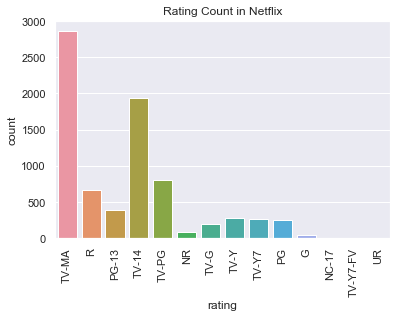

In [34]:
sns.countplot(df["rating"])
plt.xticks(rotation=90)
plt.title("Rating Count in Netflix")

In [35]:
df["duration"]

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object

In [36]:
movie_duration_series = pd.DataFrame(df[df["type"] == "Movie"]["duration"])
movie_duration_series.head(5)

,duration
1,93 min
2,78 min
3,80 min
4,123 min
6,95 min


In [37]:
movie_duration_series = movie_duration_series.replace("(\d*) min", r"\1", regex=True)
movie_duration_series["duration"] = movie_duration_series["duration"].astype("int64")
movie_duration_series.head()

,duration
1,93
2,78
3,80
4,123
6,95


Text(0.5, 1.0, 'Movies duration histgram in Netflix')

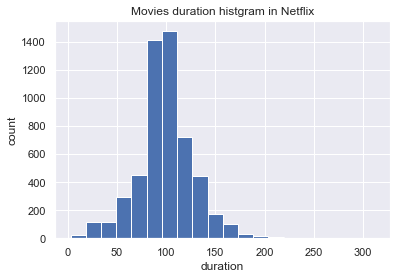

In [38]:
plt.hist(movie_duration_series["duration"], bins=20)
plt.xlabel("duration")
plt.ylabel("count")
plt.title("Movies duration histgram in Netflix")

Text(0.5, 1.0, 'Relative Frequency Distribution of Movies duration in Netflix')

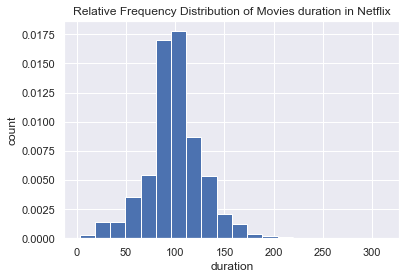

In [39]:
plt.hist(movie_duration_series["duration"], bins=20, density=True)
plt.xlabel("duration")
plt.ylabel("count")
plt.title("Relative Frequency Distribution of Movies duration in Netflix")

In [40]:
movie_duration_series.describe()

,duration
count,5377.000000
mean,99.307978
std,28.530881
min,3.000000
25%,86.000000
50%,98.000000
75%,114.000000
max,312.000000


In [41]:
df["listed_in"]

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
                              ...                        
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7785                   International TV Shows, Reality TV
7786                      Documentaries, Music & Musicals
Name: listed_in, Length: 7787, dtype: object

Text(0.5, 1.0, 'Show Type Count in Netflix')

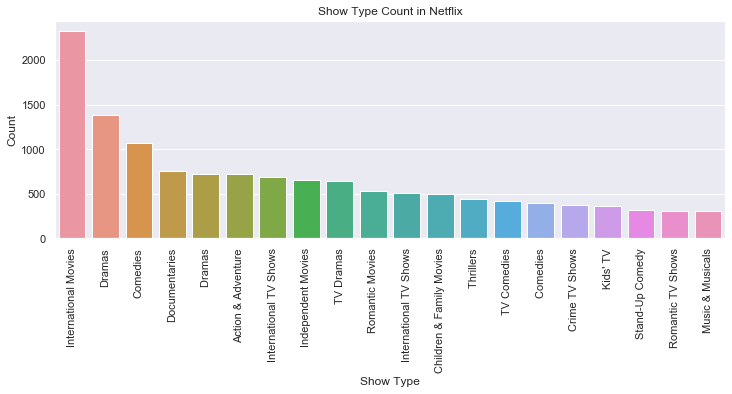

In [42]:
# Key: show classification, Value: Count 
frequent_listed_in = {}

for i in df["listed_in"].index:
    listed_in_list = df["listed_in"][i].split(",")
    for listed_in in listed_in_list:
        frequent_listed_in.setdefault(listed_in, 0)
        frequent_listed_in[listed_in] += 1
sorted_dict = sorted(frequent_listed_in.items(), key=lambda x:x[1], reverse=True)
x = []
y = []
for i in range(len(sorted_dict)):
    x.append(sorted_dict[i][0])
    y.append(sorted_dict[i][1])
plt.figure(figsize=(12, 4))
sns.barplot(x[:20], y[:20])
plt.xticks(rotation=90)
plt.xlabel("Show Type")
plt.ylabel("Count")
plt.title("Show Type Count in Netflix")

In [43]:
df["description"][0]
# Use Bag of Words, and vectorize all the words.
countvectorizer = CountVectorizer(stop_words="english")
bow = countvectorizer.fit_transform(df["description"])
bow.toarray(), bow.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 (7787, 17905))

In [44]:
# Get feature names
feature_names = countvectorizer.get_feature_names()

# View feature names
feature_names[1500:1510]

['bark',
 'barn',
 'barney',
 'barnyard',
 'barons',
 'barred',
 'barrel',
 'barren',
 'barriers',
 'barris']

In [45]:
# Create data frame (column: words in description, row: each row of original dataframe)
bow_result_df = pd.DataFrame(bow.toarray(), columns=feature_names)
bow_result_df.head()

,000,007,009,10,100,1000,102,10th,11,112,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Let's see the word that is used for 200 times.
frequent_word_df = pd.DataFrame(bow_result_df.sum(), bow_result_df.columns)
frequent_word_df = frequent_word_df.rename(columns={0:"count"})
frequent_word_df = frequent_word_df[frequent_word_df["count"] > 200]
frequent_word_df.head(5)

,count
documentary,327
family,553
father,290
finds,273
friends,383


In [47]:
frequent_word_sorted_df = frequent_word_df.sort_values("count", ascending=False)
frequent_word_sorted_df.head()

,count
life,757
young,655
new,613
family,553
world,502


Text(0.5, 1.0, 'Word Count of Movie Description')

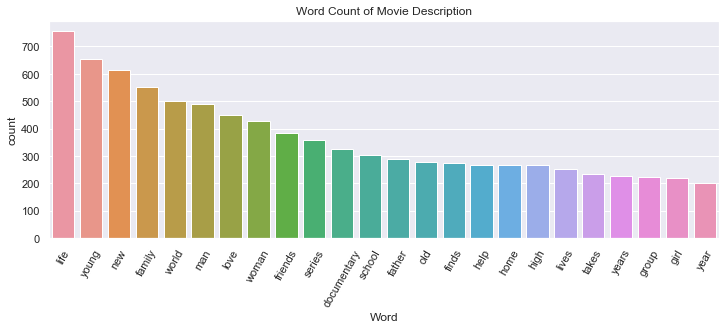

In [48]:
plt.figure(figsize=(12, 4))
sns.barplot(frequent_word_sorted_df.index, frequent_word_sorted_df["count"])
plt.xticks(rotation=60)
plt.xlabel("Word")
plt.title("Word Count of Movie Description")